# Загрузка данных

In [ ]:
import pandas as pd
df = pd.read_csv('/content/amazon_market_data.csv')

In [ ]:
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


#Приведение столбцов к стилю camel_case

In [ ]:
import re

In [ ]:
def to_camel_case(s: str) -> str:
    # Убираем лишние пробелы по краям
    s = s.strip()
    # Разбиваем по пробелам или подчёркиваниям
    parts = re.split(r'[\s_]+', s)
    # Первую часть делаем строчной, остальные — с заглавной буквы
    return parts[0].lower() + ''.join(word.capitalize() for word in parts[1:])

# Применяем преобразование к названиям колонок датафрейма df
df.columns = [to_camel_case(col) for col in df.columns]

print(df.columns)

Index(['orderDate', 'rowId', 'orderId', 'shipMode', 'customerId', 'segment',
       'country', 'city', 'state', 'postalCode', 'region', 'productId',
       'category', 'sub-category', 'productName', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')


# Приведение типов данных

In [ ]:
# Приведение столбца "Order Date" к типу datetime
df['orderDate'] = pd.to_datetime(df['orderDate'], errors='coerce')

/tmp/ipython-input-3557630323.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['orderDate'] = pd.to_datetime(df['orderDate'], errors='coerce')


In [ ]:
# Проверим результат
print(df.dtypes['orderDate'])
print(df['orderDate'].head())

datetime64[ns]
0   2020-01-01
1   2020-01-01
2   2020-01-01
3   2020-01-01
4   2020-01-01
Name: orderDate, dtype: datetime64[ns]


# Поиск дублей и пропусков в данных

In [ ]:
#Проверка пропусков
print("Количество пропусков в каждом столбце:")
print(df.isnull().sum())

Количество пропусков в каждом столбце:
orderDate       0
rowId           0
orderId         0
shipMode        0
customerId      0
segment         0
country         0
city            0
state           0
postalCode      0
region          0
productId       0
category        0
sub-category    0
productName     0
sales           0
quantity        0
discount        0
profit          0
dtype: int64


In [ ]:
# --- Проверка дубликатов ---
print("\nКоличество дубликатов в датафрейме:")
print(df.duplicated().sum())


Количество дубликатов в датафрейме:
0


In [ ]:
# вывод дубликатов:
duplicates = df[df.duplicated()]
print("\nПримеры дубликатов:")
print(duplicates.head())


Примеры дубликатов:
Empty DataFrame
Columns: [orderDate, rowId, orderId, shipMode, customerId, segment, country, city, state, postalCode, region, productId, category, sub-category, productName, sales, quantity, discount, profit]
Index: []


In [ ]:
# удаление дубликатов
df = df.drop_duplicates().reset_index(drop=True)

# Исследовательский анализ данных

In [ ]:
df

,orderDate,rowId,orderId,shipMode,customerId,segment,country,city,state,postalCode,region,productId,category,sub-category,productName,sales,quantity,discount,profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,2020-12-30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [ ]:
# сколько уникальных заказов?

In [ ]:
# Количество уникальных заказов
unique_orders = df['orderId'].nunique()
print(f"Количество уникальных заказов: {unique_orders}")

Количество уникальных заказов: 1687


In [ ]:
# сколько уникальных клиентов?

In [ ]:
unique_customers_count = df["customerId"].nunique()
print("Количество уникальных клиентов:", unique_customers_count)

Количество уникальных клиентов: 693


In [ ]:
# изучить локацию пользователей (визуализировать)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Считаем количество уникальных клиентов по каждому региону
region_customers = df.groupby("region")["customerId"].nunique().reset_index()

/tmp/ipython-input-641522137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_customers, x="region", y="customerId", palette="viridis")


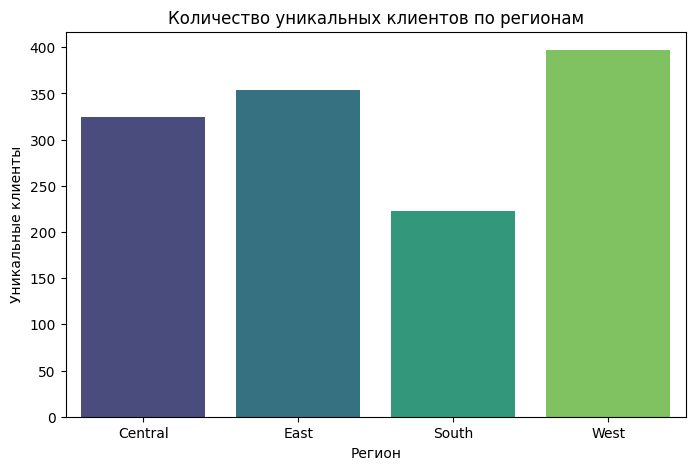

In [ ]:
# Строим barplot
plt.figure(figsize=(8,5))
sns.barplot(data=region_customers, x="region", y="customerId", palette="viridis")
plt.title("Количество уникальных клиентов по регионам")
plt.ylabel("Уникальные клиенты")
plt.xlabel("Регион")
plt.show()

In [ ]:
# изучть динамику кол-ва заказов по дате заказов

In [ ]:
# Убедимся, что 'Order Date' действительно в формате datetime
df["orderDate"] = pd.to_datetime(df["orderDate"])

/tmp/ipython-input-3347693199.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_by_month = df.resample("M", on="orderDate")["orderId"].nunique()


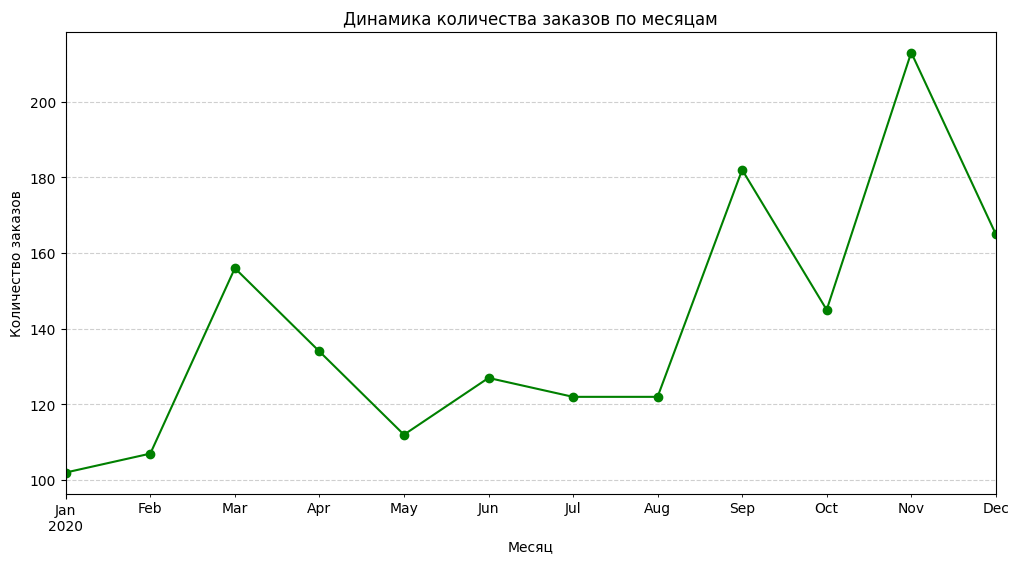

In [ ]:
#Динамика по месяцам
orders_by_month = df.resample("M", on="orderDate")["orderId"].nunique()
plt.figure(figsize=(12,6))
orders_by_month.plot(kind="line", marker="o", color="green")
plt.title("Динамика количества заказов по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Количество заказов")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:
# изучть динамику продаж по дате заказов

In [ ]:
# Преобразуем поле Order Date в формат даты
df['Order Date'] = pd.to_datetime(df['orderDate'])

In [ ]:
# Группировка по дате (по дням)
daily_sales = df.groupby('Order Date')['sales'].sum().reset_index()

In [ ]:
#месячная динамика
monthly_sales = df.set_index('Order Date').resample('M')['sales'].sum().reset_index()

/tmp/ipython-input-2350286547.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Order Date').resample('M')['sales'].sum().reset_index()


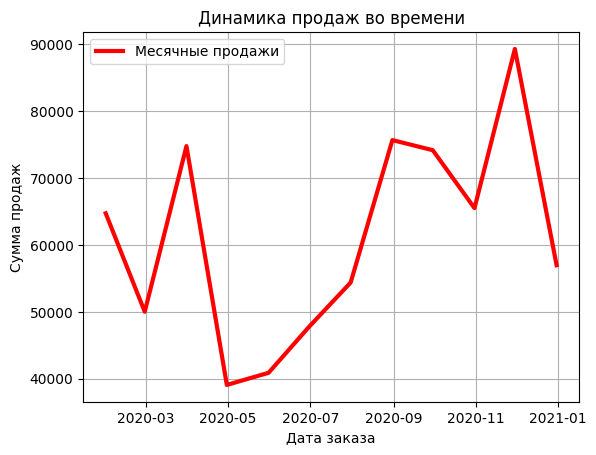

In [ ]:
#Визуализация
plt.plot(monthly_sales['Order Date'], monthly_sales['sales'], label='Месячные продажи', linewidth=3, color='red')
plt.title("Динамика продаж во времени")
plt.xlabel("Дата заказа")
plt.ylabel("Сумма продаж")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# изучть распределение продаж по категориям заказов

In [ ]:
# Группировка по категориям
category_sales = df.groupby('category')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)
print(category_sales)

          category        sales
2       Technology  271730.8110
1  Office Supplies  246097.1750
0        Furniture  215387.2692


/tmp/ipython-input-3216620340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='category', y='sales', palette='viridis')


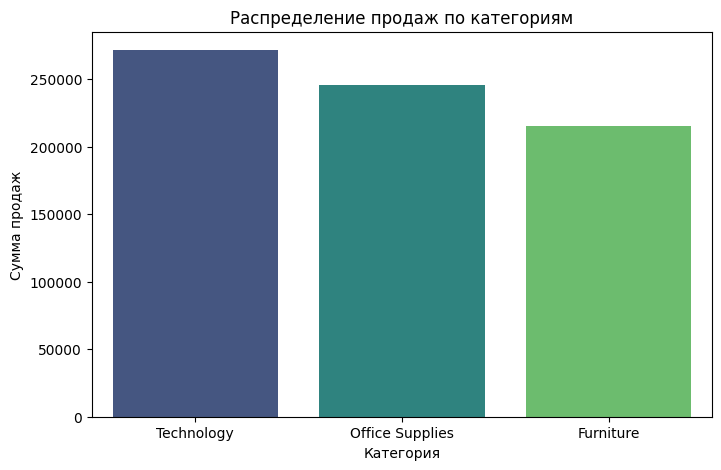

In [ ]:
# Визуализация — столбчатая диаграмма
plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x='category', y='sales', palette='viridis')
plt.title("Распределение продаж по категориям")
plt.ylabel("Сумма продаж")
plt.xlabel("Категория")
plt.show()

In [ ]:
# изучть распределение продаж по городам (штатам)

/tmp/ipython-input-2264656991.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales, x='sales', y='state', palette='viridis')


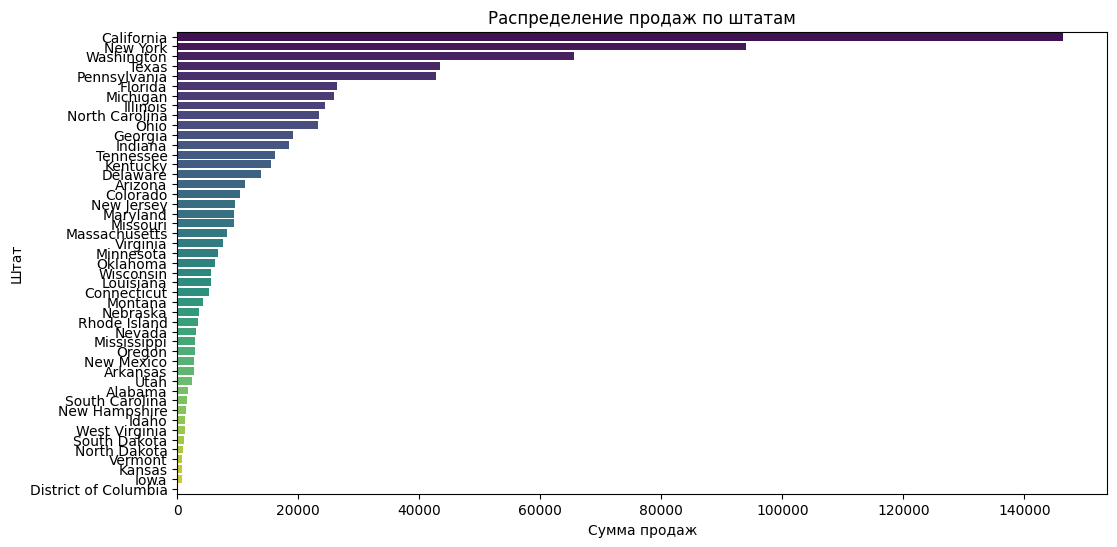

In [ ]:
#Распределение продаж по штатам
state_sales = df.groupby('state')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=state_sales, x='sales', y='state', palette='viridis')
plt.title("Распределение продаж по штатам")
plt.xlabel("Сумма продаж")
plt.ylabel("Штат")
plt.show()

In [ ]:
# найти самые популярные товары (Product Name)

In [ ]:
#Топ товаров по количеству проданных единиц
top_products_by_qty = (
    df.groupby('productName')['quantity']
      .sum()
      .reset_index()
      .sort_values(by='quantity', ascending=False)
      .head(10)
)

print("Топ-10 товаров по количеству проданных единиц:")
print(top_products_by_qty)

Топ-10 товаров по количеству проданных единиц:
                                            productName  quantity
1226                                            Staples        68
455                                   Easy-staple paper        58
1227                            Staples in misc. colors        52
1221                                    Staple envelope        39
1233                            Storex Dura Pro Binders        37
494                         Eldon Wave Desk Accessories        34
888   Memorex Mini Travel Drive 16 GB USB 2.0 Flash ...        34
810   Lesro Sheffield Collection Coffee Table, End T...        30
824     Logitech Desktop MK120 Mouse and keyboard Combo        29
97                   Adjustable Depth Letter/Legal Cart        29


/tmp/ipython-input-3555057071.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


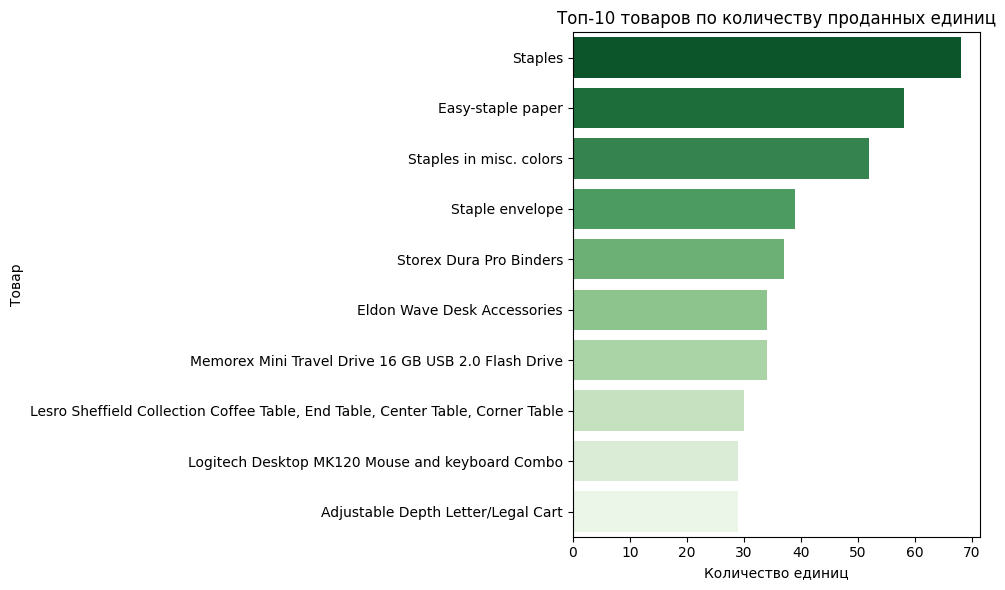

In [ ]:
# --- Топ-10 товаров по количеству единиц ---
top_qty = (
    df.groupby('productName')['quantity']
      .sum()
      .reset_index()
      .sort_values(by='quantity', ascending=False)
      .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_qty,
    y='productName', x='quantity',
    palette='Greens_r'
)
plt.title('Топ-10 товаров по количеству проданных единиц')
plt.xlabel('Количество единиц')
plt.ylabel('Товар')
plt.tight_layout()
plt.show()

In [ ]:
# изучить распределение категорий внутри городов (штатам)

In [ ]:
 #Считаем количество товаров по категориям в каждом штате
category_by_state = (
    df.groupby(['state', 'category'])['orderId']
      .nunique()
      .reset_index()
      .rename(columns={'orderId': 'numOrders'})
)

print(category_by_state.head())

     state         category  numOrders
0  Alabama        Furniture          2
1  Alabama  Office Supplies          8
2  Alabama       Technology          3
3  Arizona        Furniture          9
4  Arizona  Office Supplies         25


In [ ]:
# Берем топ-10 городов по числу заказов, чтобы график был читаемый
top_cities = (
    df.groupby('city')['orderId']
      .nunique()
      .sort_values(ascending=False)
      .head(10)
      .index
)

city_category = (
    df[df['city'].isin(top_cities)]
    .groupby(['city', 'category'])['orderId']
    .nunique()
    .unstack(fill_value=0)
)

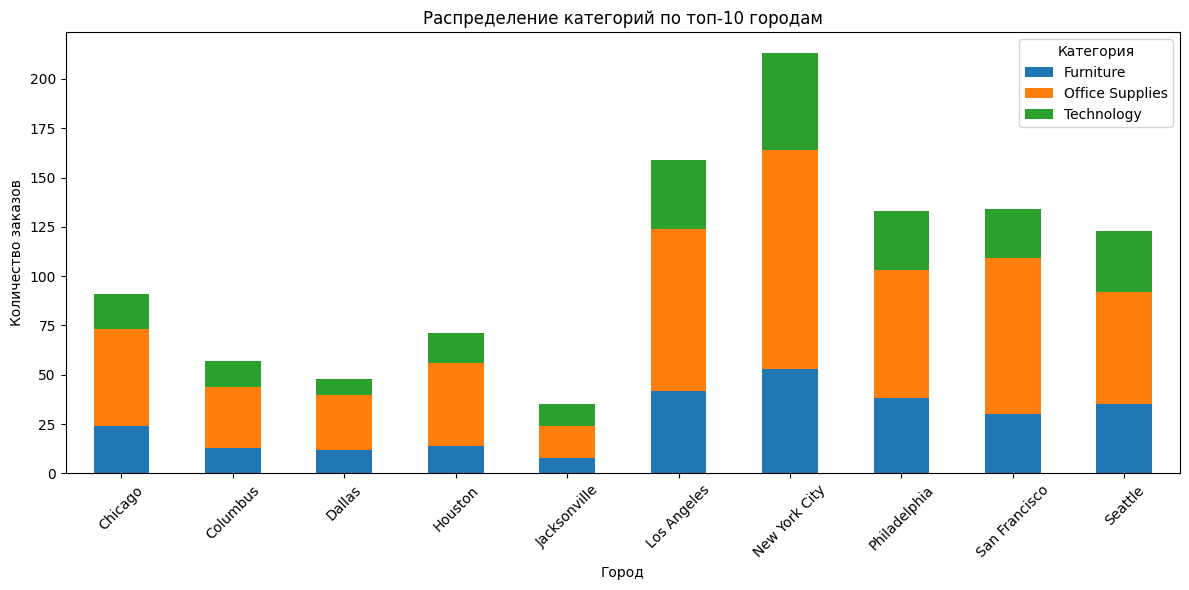

In [ ]:
# Стековая диаграмма
city_category.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Распределение категорий по топ-10 городам")
plt.ylabel("Количество заказов")
plt.xlabel("Город")
plt.xticks(rotation=45)
plt.legend(title="Категория")
plt.tight_layout()
plt.show()

In [ ]:
# изучить динамику продаж внутри категорий

In [ ]:
# Добавим колонку с месяцем (или можно с год-месяц)
df['YearMonth'] = df['orderDate'].dt.to_period('M')

In [ ]:
# Агрегируем продажи по категориям и месяцам
sales_by_cat = (
    df.groupby(['YearMonth', 'category'])['sales']
    .sum()
    .reset_index()
)

In [ ]:
# Переводим обратно в datetime для удобства графиков
sales_by_cat['YearMonth'] = sales_by_cat['YearMonth'].dt.to_timestamp()

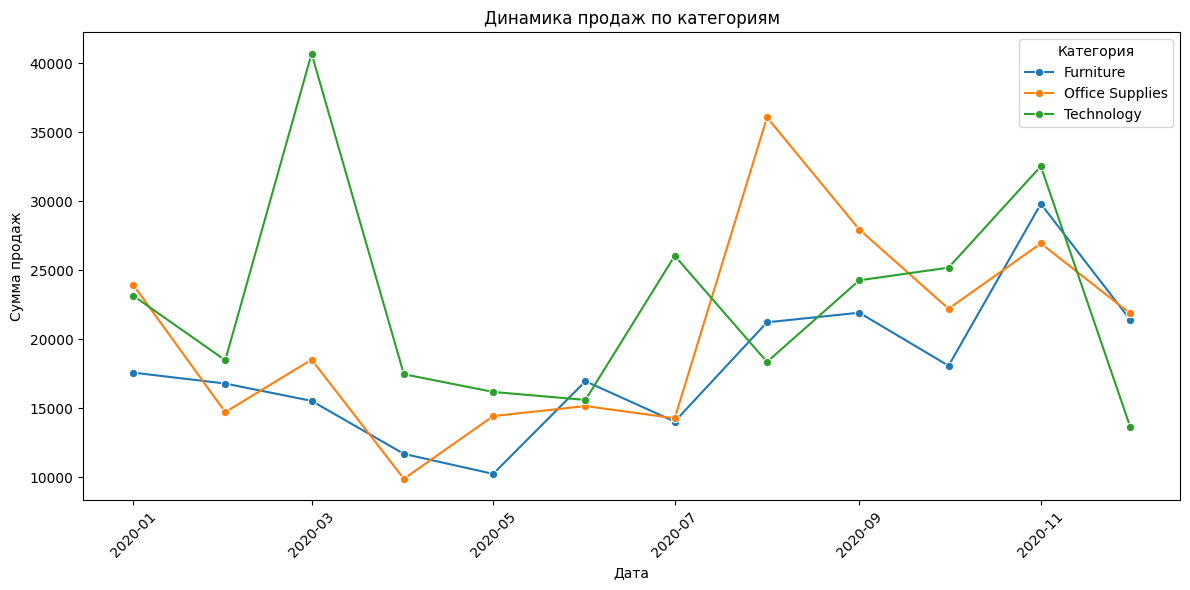

In [ ]:
# Визуализация
plt.figure(figsize=(12,6))
sns.lineplot(
    data=sales_by_cat,
    x='YearMonth', y='sales', hue='category', marker="o"
)
plt.title("Динамика продаж по категориям")
plt.xlabel("Дата")
plt.ylabel("Сумма продаж")
plt.xticks(rotation=45)
plt.legend(title="Категория")
plt.tight_layout()
plt.show()